In [271]:
#載入套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [272]:
#使用資料夾內鐵達尼號的資料集，練習邏輯迴歸的處理邏輯
train = pd.read_csv('data/titanic_data.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


<AxesSubplot:>

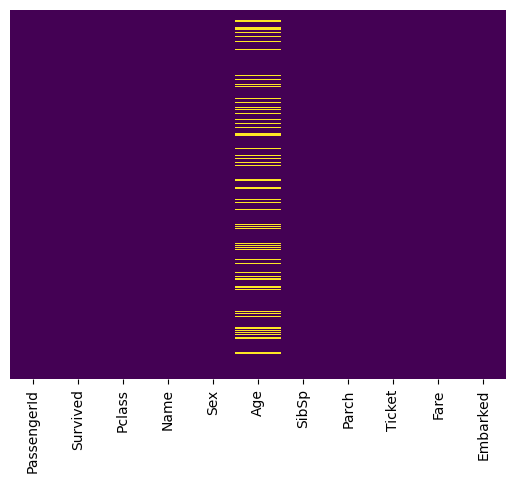

In [273]:
#探索資料
#用heatmap(.isnull()來找出缺失的資料在哪些欄位。Age似乎約有五分之一的資料缺失，可用合理資料補充。)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

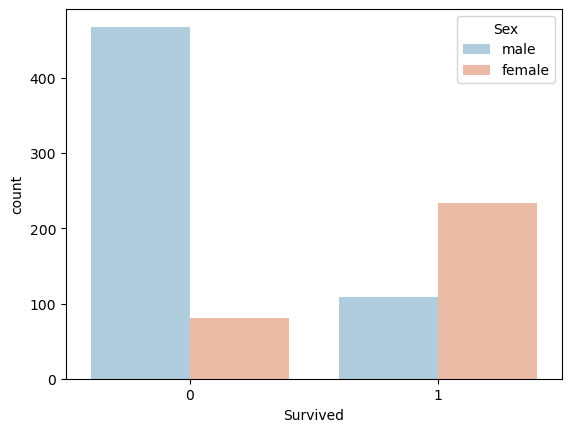

In [274]:
#用countplot來看性別是否影響最後存活。女性存活比例比男性高。
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

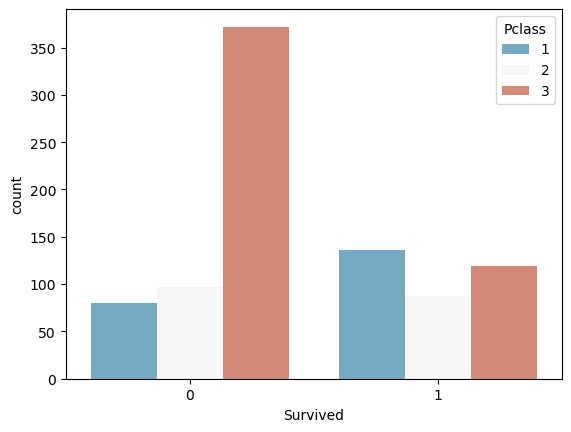

In [275]:
# 艙等是否也影響存活? 
# Finding : Pclass = 3 存活比例明顯較低、Pclass = 1 存活比例會略高一點
sns.countplot(x='Survived', hue='Pclass', data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Age', ylabel='Count'>

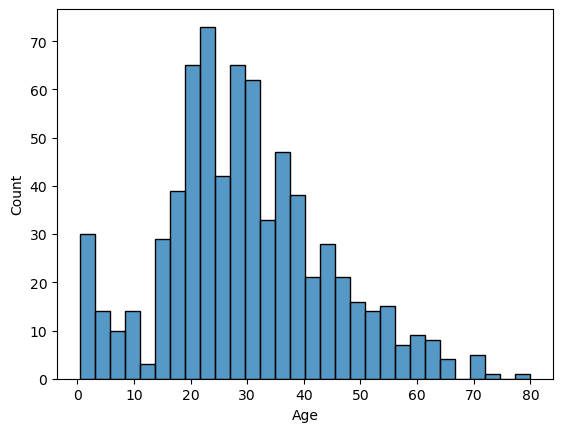

In [276]:
# 用直方圖看年齡分佈。缺失資料在此不計。
sns.histplot(train['Age'].dropna(), kde = False, bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

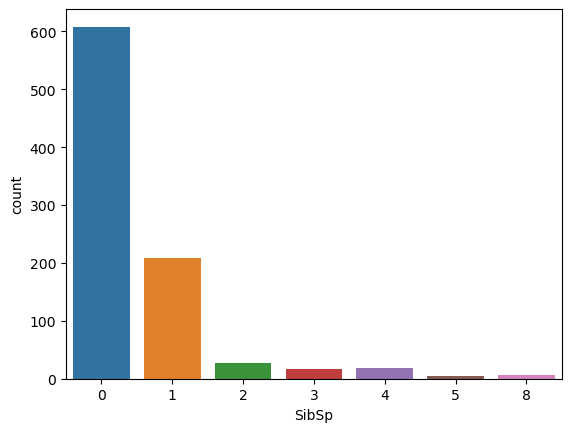

In [277]:
#SibSp代表兄弟姐妹或眷屬人數
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

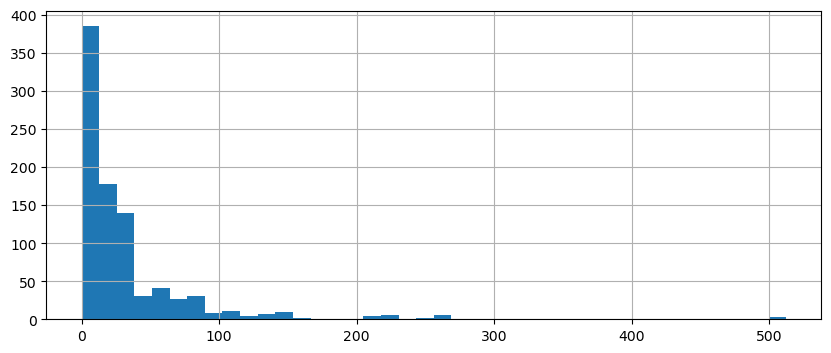

In [278]:
#用直方圖看票價分佈
train['Fare'].hist(bins=40,figsize=(10,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

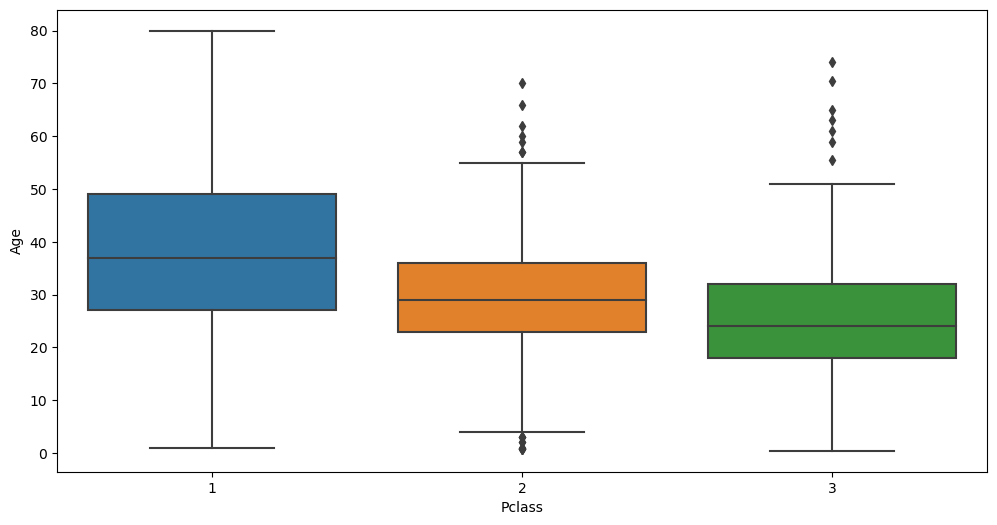

In [279]:
#資料清理
#剛有看到年齡資料約有五分之一缺失，一種做法是棄之不用(dropna)，一種可以考慮把年齡平均放進去。
#使用盒鬚圖來看年齡和艙等的分佈。看起來頭等艙年齡較高，隨之降低。
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)


<AxesSubplot:xlabel='Age', ylabel='Count'>

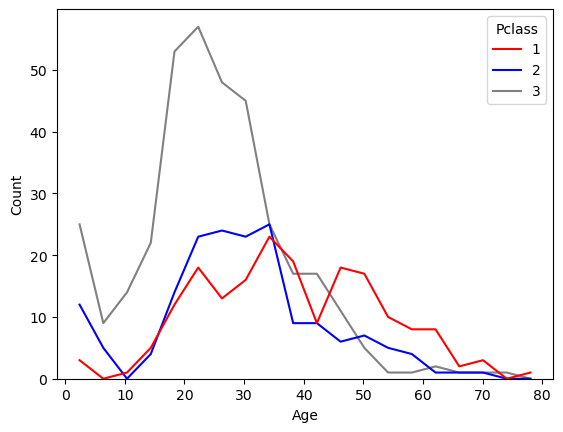

In [280]:
# 用直方圖來看年齡和艙等的分佈
sns.histplot(data = train, x = "Age", hue = "Pclass", palette = ['red', 'blue', 'gray'], element = 'poly', fill = False)

In [281]:
#把艙等平均年齡填入缺失的資料中
#艙等1平均年齡是37，艙等2平均年齡是29，艙等3平均年齡是24
def impute_age(cols): 
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

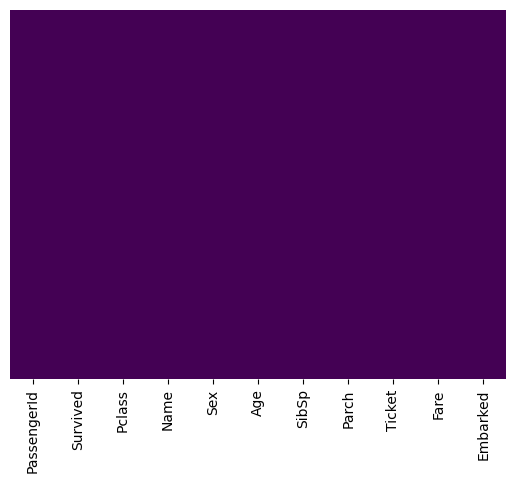

In [282]:
#用heatmap查看年齡是否還有缺失資料
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [283]:
train.dropna(inplace=True)#inplace： False: 返回新的數據集（默認） True: 在原數據集上操作

In [284]:
#虛擬變數範例
#使用pandas(d.get_dummies)將性別從類別資料轉為數值變數。
sex = pd.get_dummies(train['Sex'], drop_first = True)

#請將drop_first=True，如果為True會刪除第一個類別值。
#本來若有k個level，drop_first=True會只剩下k-1個level，降低共線性的可能
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [285]:
# 沒有設 drop_first = True 會變這樣
sex_tmp = pd.get_dummies(train['Sex'])
sex_tmp.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [286]:
#使用pandas將上船的港口從類別資料改換為數值變數(drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [287]:
#將性別及上船港口的數值變數和原始的data結合
train = pd.concat([train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [288]:
#將原始的性別、登船港口、票號、姓名欄位棄用
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [289]:
#因為PassengerId在此也只是排序，因此也棄用
train.drop('PassengerId', axis = 1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [290]:
#建立feature資料集(選取survived以外所有欄位)與target資料集(survived)
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [291]:
#載入訓練組及測試組分組套件
from sklearn.model_selection import train_test_split

In [292]:
#設定隨機種子(random_state)為101，測試組比例佔30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [293]:
#載入邏輯回歸
from sklearn.linear_model import LogisticRegression

In [294]:
#建立訓練組邏輯迴歸模型
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [295]:
#使用模型進行測試集資料的預測
predictions_test = logmodel.predict(X_test)
predictions_train = logmodel.predict(X_train)

In [296]:
#ground truth
print(y_test.values)
print(y_train.values)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0
 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 1 1 0 0 1 0 1 0]
[0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 

#### 計算accuracy及結果顯示
accuracy<br>
error_index #錯誤答案是哪幾筆資料<br>
miss classification #錯誤答案<br>
錯誤欄位的正確之原始資料表格

In [297]:
error_index_train = np.where(predictions_train != y_train.values)[0]
print('train accuracy:',1 - len(error_index_train)/len(X_train))

error_index_test = np.where(predictions_test != y_test.values)[0]
print('test accuracy:',1 - len(error_index_test)/len(X_test))

train accuracy: 0.8006430868167203
test accuracy: 0.8277153558052435


In [300]:
print('error_index:', error_index_test)
print('miss classification :', predictions_test[error_index_test])  # 錯誤答案
data_index = X_test.iloc[error_index_test].index                    # 

train.loc[data_index]                                              # 錯誤欄位的正確之原始資料

error_index: [ 25  26  27  35  40  44  57  64  67  70  71  75  80  90  94  97 100 103
 104 105 109 120 122 125 131 134 152 163 171 176 182 189 196 199 206 219
 223 227 234 242 243 247 248 257 263 266]
miss classification : [0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 0 0 0 1 0 0 1]


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
724,1,1,27.00,1,0,53.1000,1,0,1
139,0,1,24.00,0,0,79.2000,1,0,0
657,0,3,32.00,1,1,15.5000,0,1,0
622,1,3,20.00,1,1,15.7417,1,0,0
729,0,3,25.00,1,0,7.9250,0,0,1
816,0,3,23.00,0,0,7.9250,0,0,1
429,1,3,32.00,0,0,8.0500,1,0,1
788,1,3,1.00,1,2,20.5750,1,0,1
701,1,1,35.00,0,0,26.2875,1,0,1
390,1,1,36.00,1,2,120.0000,1,0,1


In [298]:

# 挑出預測錯誤的資料
# df_compare = pd.concat([X_test, pd.DataFrame(y_test, index = X_test.index), pd.DataFrame(predictions_test, columns = ['prediction'], index = X_test.index)], axis = 1)
# df_compare[df_compare.prediction != df_compare.Survived].sort_index()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived,prediction
24,3,8.00,3,1,21.0750,0,0,1,0,1
27,1,19.00,3,2,263.0000,1,0,1,0,1
36,3,24.00,0,0,7.2292,1,0,0,1,0
55,1,37.00,0,0,35.5000,1,0,1,1,0
85,3,33.00,3,0,15.8500,0,0,1,1,0
107,3,24.00,0,0,7.7750,1,0,1,1,0
114,3,17.00,0,0,14.4583,0,0,0,0,1
119,3,2.00,4,2,31.2750,0,0,1,0,1
127,3,24.00,0,0,7.1417,1,0,1,1,0
139,1,24.00,0,0,79.2000,1,0,0,0,1
